<a href="https://colab.research.google.com/github/poojaojha-ai/AIHC-5010-Winter-2026/blob/main/AIHC5010_Week_2_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a Jupyter notebook that implements a perceptron and trains the model on an example dataset

Dataset 1: a linearly separable dataset

Dataset 2: a model of the XOR problem

Extra credit: create a simple model that can be trained to solve XOR

In [54]:
# Dataset 1
import numpy as np # Numpy will help us in generating the random data

def generate_linear_data(n_samples=100): # we want to generate 100 sample data points
  # Class 1
  x_1 = np.random.randn(n_samples // 2,2) + np.array([1, 1]) # creates cloud of points around a center; first cloud to be centered at (1,1)
  y_1 = np.zeros(n_samples // 2) # splitting our 100 samples into two

  # Class 2
  x_2 = np.random.randn(n_samples // 2,2) + np.array([5, 5]) # same as before, but moves the second cloud to (5, 5)
  y_2 = np.ones(n_samples // 2)

  # Add the two arrays together - vstack for x (to add the rows together) and concatenate for y (to join two lists together - 0s and 1s)
  x = np.vstack((x_1, x_2))
  y = np.concatenate((y_1, y_2))

  return x, y

x_linear, y_linear = generate_linear_data()



In [55]:
# Print a summary of the dataset
print(f"Total samples: {len(x_linear)}")
print(f"Shape of features (x): {x_linear.shape}")
print(f"Shape of labels (y): {y_linear.shape}")

print("First 5 data points (Class 1):")
# This shows the x, y coordinates and the label (0.0)
for i in range(5):
    print(f"Point {i+1}: Coordinates {x_linear[i]} -> Label: {y_linear[i]}")

print("Last 5 data points (Class 2):")
# This shows the x, y coordinates and the label (1.0)
for i in range(-5, 0):
    print(f"Point {len(x_linear)+i+1}: Coordinates {x_linear[i]} -> Label: {y_linear[i]}")

Total samples: 100
Shape of features (x): (100, 2)
Shape of labels (y): (100,)
First 5 data points (Class 1):
Point 1: Coordinates [0.0409919 2.3820046] -> Label: 0.0
Point 2: Coordinates [1.90512196 0.39609563] -> Label: 0.0
Point 3: Coordinates [1.30444912 1.25720749] -> Label: 0.0
Point 4: Coordinates [1.02393181 1.87191399] -> Label: 0.0
Point 5: Coordinates [2.43735633 1.00730637] -> Label: 0.0
Last 5 data points (Class 2):
Point 96: Coordinates [6.51623332 5.31245848] -> Label: 1.0
Point 97: Coordinates [4.68697629 3.40087653] -> Label: 1.0
Point 98: Coordinates [3.63140988 5.53549181] -> Label: 1.0
Point 99: Coordinates [6.06044681 6.541371  ] -> Label: 1.0
Point 100: Coordinates [4.17210692 4.69613556] -> Label: 1.0


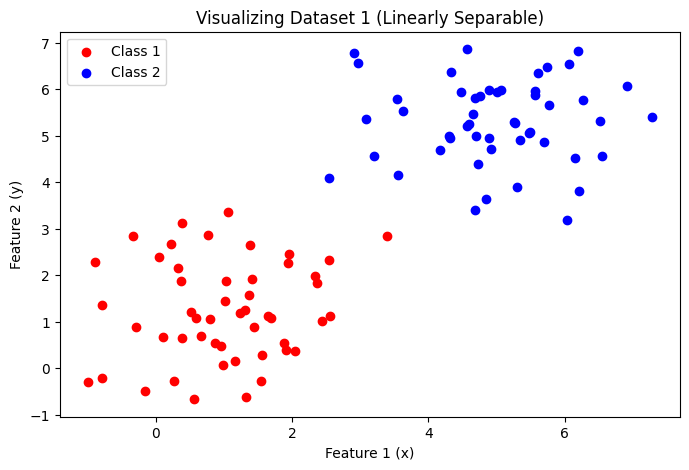

In [56]:
import matplotlib.pyplot as plt

# Plotting the points
plt.figure(figsize=(8, 5))
plt.scatter(x_linear[y_linear == 0, 0], x_linear[y_linear == 0, 1], color='red', label='Class 1')
plt.scatter(x_linear[y_linear == 1, 0], x_linear[y_linear == 1, 1], color='blue', label='Class 2')

plt.title("Visualizing Dataset 1 (Linearly Separable)")
plt.xlabel("Feature 1 (x)")
plt.ylabel("Feature 2 (y)")
plt.legend()
plt.show()

What is XOR?
Exclusive OR (XOR) is non-linearly separable, unlike our previous linearly separable dataset. You cannot draw a single straight line to separate the first and second clusters/classification groups.

In [57]:
# Dataset 2 - XOR

import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Define the number of points per cluster
points_per_cluster = 25

# Create the four clusters
# Cluster 0,0 (Label 0)
c00 = np.random.randn(points_per_cluster, 2) * 0.1 + np.array([0, 0])
# Cluster 1,1 (Label 0)
c11 = np.random.randn(points_per_cluster, 2) * 0.1 + np.array([1, 1])
# Cluster 0,1 (Label 1)
c01 = np.random.randn(points_per_cluster, 2) * 0.1 + np.array([0, 1])
# Cluster 1,0 (Label 1)
c10 = np.random.randn(points_per_cluster, 2) * 0.1 + np.array([1, 0])

# Combine features and create labels
X_xor_100 = np.vstack([c00, c11, c01, c10])
y_xor_100 = np.array([0]*50 + [1]*50)



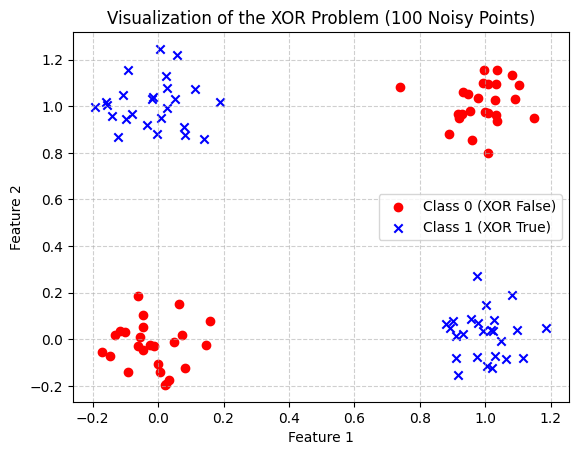

In [58]:
# Plot the data
plt.scatter(X_xor_100[y_xor_100 == 0][:, 0], X_xor_100[y_xor_100 == 0][:, 1],
            color='red', marker='o', label='Class 0 (XOR False)')
plt.scatter(X_xor_100[y_xor_100 == 1][:, 0], X_xor_100[y_xor_100 == 1][:, 1],
            color='blue', marker='x', label='Class 1 (XOR True)')

# Add labels and formatting
plt.title('Visualization of the XOR Problem (100 Noisy Points)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('xor_plot.png')

In [59]:
# Extra Credit
import numpy as np
from sklearn.neural_network import MLPClassifier

# Define a single layer perceptron
# We use hidden_layer_sizes=() to ensure no hidden layers exist.
# We use 'identity' activation because a pure perceptron is a linear function.
perceptron = MLPClassifier(hidden_layer_sizes=(), activation='identity', solver='lbfgs', max_iter=1000)

def test_model(name, x_data, y_data):
    perceptron.fit(x_data, y_data)
    score = perceptron.score(x_data, y_data) * 100
    print(f"Result for {name}")
    print(f"Predictions: {perceptron.predict(x_data)}")
    print(f"Actual:      {y_data}")
    print(f"Accuracy:    {score}%")

    if score == 100:
        print("Conclusion: Success! A single straight line can separate this data.\n")
    else:
        print("Conclusion: Failure. A single straight line cannot separate this data (Linear Inseparability).\n")

# Run the tests
test_model("Linear Dataset", x_linear, y_linear)
test_model("XOR Dataset", X_xor_100, y_xor_100)

Result for Linear Dataset
Predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Actual:      [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Accuracy:    100.0%
Conclusion: Success! A single straight line can separate this data.

Result for XOR Dataset
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual:

**Conclusion**

The XOR dataset is non-linearly separable. Because the classes are arranged in a "checkerboard" pattern, it is impossible to draw a single linear decision boundary (a straight line) that separates the red circles from the blue crosses. This demonstrates the fundamental limitation of a single-layer perceptron, which can only solve problems where classes can be divided by a single line.